In [1]:
import numpy as np 
import pandas as pd 
import matplotlib as plt 
import os 

In [2]:
os.getcwd() 

'/kaggle/working'

In [3]:
os.chdir("/kaggle/") 
os.getcwd()
os.listdir('/kaggle/input/diamonds-dataset') 

['diamonds.csv']

In [4]:
diamonds = pd.read_csv('/kaggle/input/diamonds-dataset/diamonds.csv')    

In [5]:
diamonds.head(5) 

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
diamonds.shape

(53940, 11)

**Conclusion**: 

1. data set contains **10 features of 53940 different diamonds**,

2. including both numeric and categorical variables.  

In [7]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


# Histograms

1. A histogram is a **univariate** plot (a plot that displays **one variable**) that **groups a numeric variable into bins** and displays the number of observations that fall within each bin. 

2. getting a sense of the **distribution of a numeric variable** 

array([[<Axes: title={'center': 'carat'}>]], dtype=object)

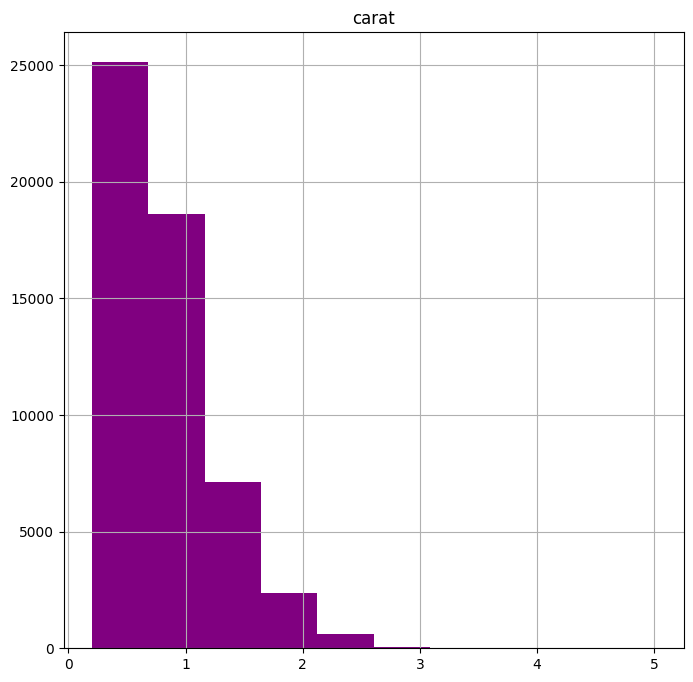

In [8]:
# create a histogram of diamond carat weight:

diamonds.hist(column = "carat", 
             figsize = (8, 8), 
             color = 'purple') 


**Conclusion:**

1. Shape: **positively skewed**.

2. Distribution: **most diamonds are around 1 carat or below**, but there are **extreme cases of larger diamonds**.  

3. The plot above has fairly wide bins and there doesn't appear to be any data beyond a carat size of 3.5 --> Adding some additional arguments to **control the size of the bins and limits of the x-axis:** 

array([[<Axes: title={'center': 'carat'}>]], dtype=object)

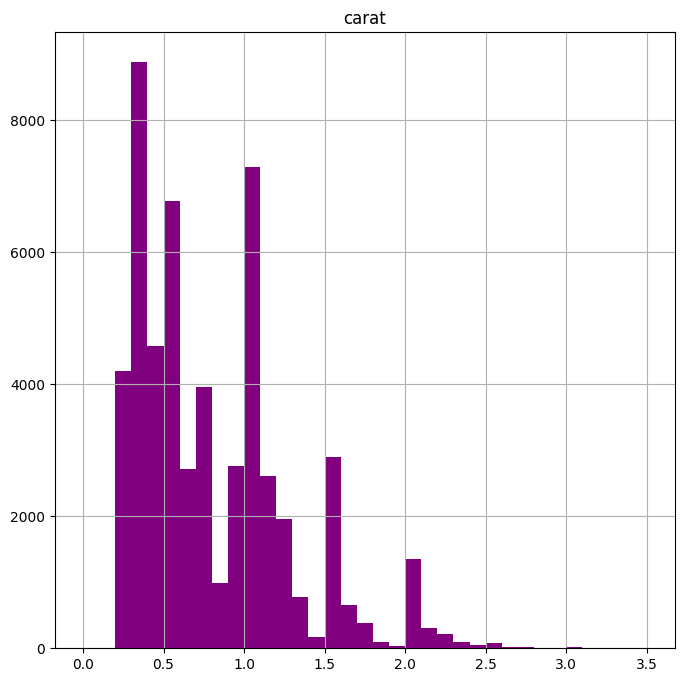

In [9]:
diamonds.hist(column = 'carat', 
             figsize = (8, 8), 
             color = 'purple', 
             bins = 35, 
             range = (0, 3.5)) 

1. Limiting the X-axis to 3.5 **might have cut out some outliers with counts so small that they didn't show up as bars** on our original chart. 

2. Let's check to see if any diamonds are larger than 3.5 carats:   

In [10]:
 large_diamonds = diamonds[diamonds['carat'] > 3.5]  
 large_diamonds

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
23644,23645,3.65,Fair,H,I1,67.1,53.0,11668,9.53,9.48,6.38
25998,25999,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
25999,26000,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
26444,26445,4.00,Very Good,I,I1,63.3,58.0,15984,10.01,9.94,6.31
26534,26535,3.67,Premium,I,I1,62.4,56.0,16193,9.86,9.81,6.13
27130,27131,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43
27415,27416,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98
27630,27631,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72
27679,27680,3.51,Premium,J,VS2,62.5,59.0,18701,9.66,9.63,6.03


In [11]:
large_diamonds.describe() 

,Unnamed: 0,carat,depth,table,price,x,y,z
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,26498.000000,4.054444,63.877778,58.555556,16318.888889,10.021111,9.938889,6.376667
std,1253.246684,0.465299,2.004855,2.788867,2197.609579,0.348692,0.309574,0.302407
min,23645.000000,3.510000,61.000000,53.000000,11668.000000,9.530000,9.480000,6.030000
25%,26000.000000,3.670000,62.500000,58.000000,15223.000000,9.860000,9.810000,6.170000
50%,26535.000000,4.010000,63.300000,59.000000,16193.000000,10.010000,9.940000,6.310000
75%,27416.000000,4.130000,65.500000,61.000000,18018.000000,10.140000,10.100000,6.430000
max,27680.000000,5.010000,67.100000,62.000000,18701.000000,10.740000,10.540000,6.980000


**Conclusion:**

1. 9 diamonds are bigger than 3.5 carats. 
   
2. On one hand, these outliers have very little bearing on the shape of the distribution.

3. On the other hand, limiting the X-axis to 3.5 implies that no data lies beyond that point.

4. If we were to show this plot to someone else, it could be misleading.

5. Including a note that nine diamonds lie beyond the chart range could be helpful. 



# BoxPlot 

Boxplots are another type of **univariate** plot for summarizing **distributions of numeric data** graphically.  

<Axes: >

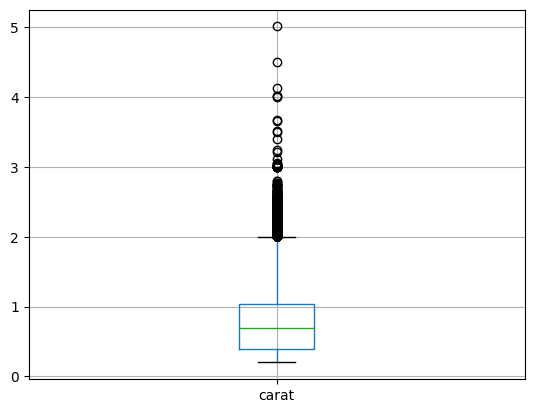

In [12]:
# make a boxplot of carat: 
diamonds.boxplot(column = 'carat') 

**Conclusion:** 

1. central box: the middle 50% of the observations
   
2. the central bar: the median

3. the bars at the end of the dotted lines (upper whiskers): encapsulate the great majority of the observations.

4. Circles that lie beyond the end of the whiskers:  are data that may be outliers.

5. In this case, our data set has over 50,000 observations and we see **many data points beyond the top whisker**. 

6. We probably wouldn't want to classify all of those points as outliers, **but the handful of diamonds at 4 carats and above are definitely far outside the norm**.  


1. One of the most useful features of a boxplot is the ability to make **side-by-side boxplots.** 

2. A side-by-side boxplot **takes a numeric variable and splits it on based on some categorical variable**, drawing a different boxplot for each level of the categorical variable.

<Axes: title={'center': 'price'}, xlabel='clarity'>

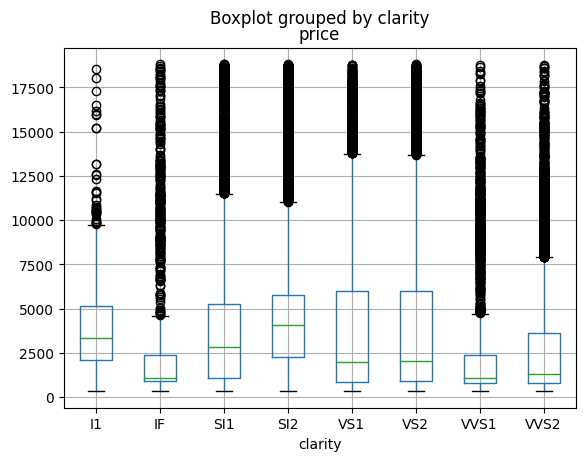

In [13]:
# make a side-by-side boxplot of diamond price split by diamond clarity  

diamonds.boxplot(column = 'price',  
                 by = 'clarity')

The boxplot above is curious: we'd expect diamonds with better clarity to fetch higher prices and yet diamonds on the highest end of the clarity spectrum (IF = internally flawless) actually have lower median prices than low clarity diamonds! 

What gives? Perhaps another boxplot can shed some light on this situation. 



<Axes: title={'center': 'carat'}, xlabel='clarity'>

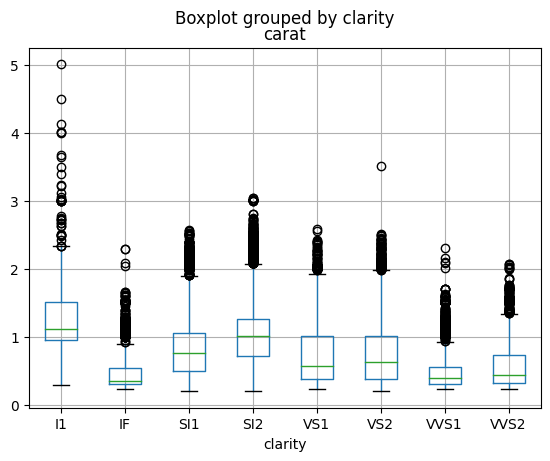

In [14]:
diamonds.boxplot(column = 'carat', 
                   by = 'clarity') 

Conclusion: 

The plot above shows that diamonds with **low clarity ratings also tend to be larger**.
Since size is an important factor in determining a diamond's value, it isn't too  surprising that low clarity diamonds have higher median prices. 

# Density Plots

1. A density plot shows the **distribution of a numeric variable with a continuous curve**.
   
2. It is similar to a histogram but without discrete bins, a density plot gives a better picture of the underlying shape of a distribution. Create a density plot with series.plot(kind="density") 